In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


In [66]:
num_want = 1000

start_tok = ' the'
start_t = encode(start_tok)
kept = [start_t]
scores = [0]
max_similarity = torch.full((d_V,), -1000)

while len(kept) < num_want:
    latest_v = unembed_norm[:, kept[-1]]
    similarity = torch.matmul(latest_v, unembed_norm)
    max_similarity = torch.maximum(max_similarity, similarity)

    next_t = torch.argmin(max_similarity).item()
    kept.append(next_t)
    score = max_similarity[next_t]
    scores.append(score)

    print(f'{decode(next_t):20}', score)

kept_tensor = torch.tensor(kept)

irez                 tensor(-0.2208)
Wall                 tensor(-0.0808)
 roadmap             tensor(-0.0652)
 Regiment            tensor(-0.0402)
 bapt                tensor(-0.0223)
seeing               tensor(-0.0112)
 depended            tensor(-0.0050)
 yen                 tensor(-0.0003)
 STUD                tensor(0.0009)
 mog                 tensor(0.0071)
isers                tensor(0.0115)
 screams             tensor(0.0149)
 Cros                tensor(0.0164)
 Vegan               tensor(0.0190)
 misdemeanor         tensor(0.0247)
dd                   tensor(0.0263)
formance             tensor(0.0298)
 acet                tensor(0.0330)
.")                  tensor(0.0360)
 (#                  tensor(0.0365)
 Lavrov              tensor(0.0385)
ּ                    tensor(0.0399)
ño                   tensor(0.0439)
 1440                tensor(0.0514)
 hello               tensor(0.0523)
uate                 tensor(0.0531)
Topic                tensor(0.0536)
 signific           

 Jeremiah            tensor(0.1252)
thinkable            tensor(0.1253)
ventory              tensor(0.1253)
chief                tensor(0.1256)
 coli                tensor(0.1260)
 exclusion           tensor(0.1263)
 Syndrome            tensor(0.1265)
ivalry               tensor(0.1265)
 POW                 tensor(0.1266)
 ‎                   tensor(0.1266)
 MSG                 tensor(0.1267)
 martial             tensor(0.1268)
alities              tensor(0.1273)
 Magazine            tensor(0.1274)
™:                   tensor(0.1276)
wealth               tensor(0.1279)
ffect                tensor(0.1282)
velt                 tensor(0.1284)
 sew                 tensor(0.1286)
 Noir                tensor(0.1286)
lessness             tensor(0.1288)
perture              tensor(0.1288)
whatever             tensor(0.1289)
upt                  tensor(0.1289)
 posit               tensor(0.1291)
 unlimited           tensor(0.1291)
 liter               tensor(0.1293)
chrom                tensor(

 blacks              tensor(0.1481)
oooooooooooooooo     tensor(0.1481)
bred                 tensor(0.1483)
uni                  tensor(0.1483)
oub                  tensor(0.1484)
 Fri                 tensor(0.1484)
 Anonymous           tensor(0.1486)
Thumbnail            tensor(0.1487)
 goto                tensor(0.1487)
 nav                 tensor(0.1487)
 playthrough         tensor(0.1487)
DER                  tensor(0.1489)
 Targ                tensor(0.1489)
teenth               tensor(0.1489)
thia                 tensor(0.1492)
 ⓘ                   tensor(0.1494)
 OMG                 tensor(0.1494)
hs                   tensor(0.1494)
ogue                 tensor(0.1494)
 Bench               tensor(0.1495)
 Berks               tensor(0.1495)
zilla                tensor(0.1496)
 sep                 tensor(0.1496)
urally               tensor(0.1498)
 Mehran              tensor(0.1498)
 Alone               tensor(0.1499)
ariat                tensor(0.1500)
 gall                tensor(

velength             tensor(0.1609)
ento                 tensor(0.1609)
hetti                tensor(0.1609)
Merit                tensor(0.1609)
 Satanic             tensor(0.1610)
mint                 tensor(0.1611)
BLIC                 tensor(0.1611)
 Doct                tensor(0.1611)
bie                  tensor(0.1611)
resistant            tensor(0.1612)
 Nasa                tensor(0.1613)
asma                 tensor(0.1613)
ergy                 tensor(0.1614)
 nets                tensor(0.1614)
 Relief              tensor(0.1614)
 Sets                tensor(0.1615)
ses                  tensor(0.1615)
 Figures             tensor(0.1615)
illary               tensor(0.1615)
 lifetime            tensor(0.1615)
 ré                  tensor(0.1615)
xon                  tensor(0.1616)
rollers              tensor(0.1617)
isans                tensor(0.1618)
ayn                  tensor(0.1618)
plex                 tensor(0.1618)
indu                 tensor(0.1618)
 reps                tensor(

heit                 tensor(0.1709)
rians                tensor(0.1709)
ution                tensor(0.1709)
 dissenting          tensor(0.1710)
otent                tensor(0.1710)
RAFT                 tensor(0.1711)
Spoiler              tensor(0.1711)
 AoE                 tensor(0.1711)
Pg                   tensor(0.1712)
 licens              tensor(0.1712)
peat                 tensor(0.1712)
sie                  tensor(0.1713)
 Pru                 tensor(0.1713)
 Equal               tensor(0.1713)
 Kinnikuman          tensor(0.1713)
antle                tensor(0.1714)
cised                tensor(0.1714)
naires               tensor(0.1714)
 overnight           tensor(0.1714)
 precon              tensor(0.1715)
etary                tensor(0.1715)
 NEXT                tensor(0.1715)
stress               tensor(0.1715)
yrights              tensor(0.1716)
 pens                tensor(0.1716)
shock                tensor(0.1717)
 nowhere             tensor(0.1718)
Introduced           tensor(

In [3]:
from sklearn.decomposition import SparseCoder

dictionary = unembed_norm[:, kept_tensor].T

toks = [' cat', ' dog', 'peace', ' war', ' love']
sc = SparseCoder(dictionary, transform_alpha=0.15, transform_algorithm='lasso_cd', positive_code=True)

vs = torch.zeros((len(toks), d_M))
for i in range(len(toks)):
    t = encode(toks[i])
    vs[i,:] = unembed_norm[:, t]
codes = torch.tensor(sc.transform(vs))
for i in range(len(toks)):
    print(f"+++{toks[i]}+++")
    for index in torch.nonzero(codes[i]):
        t = kept_tensor[index]
        print(f'{decode(t):20}', codes[i,index].item())

+++ cat+++
 mog                 0.028380200296375533
 chim                0.06027096426497135
 vic                 0.022311929508652736
 du                  0.008901823905640033
 casc                0.0032605170982635276
 comp                0.00040788606372757177
 nat                 0.011620397307593379
+++ dog+++
 jam                 0.0002456325643308716
 daddy               0.0010316285982853231
 tongue              0.01795656278367279
 terr                0.0056657625770762015
 chim                0.012235963369286704
 bulls               0.072401496147402
 stamp               0.011877610407259286
 wheelchair          0.02368157888770673
 kit                 0.03158934715241119
 hind                0.033557654997631574
 nat                 0.013311674581933788
 angel               0.010113080763223412
+++peace+++
chief                0.008657803242567062
fam                  0.017612997982923987
warm                 0.050734552715598964
past                 0.020452549415180474
n

[262, 31762, 22401, 40332, 35588, 20452]
[' the', 'irez', 'Wall', ' roadmap', ' Regiment', ' bapt']


<BarContainer object of 6 artists>

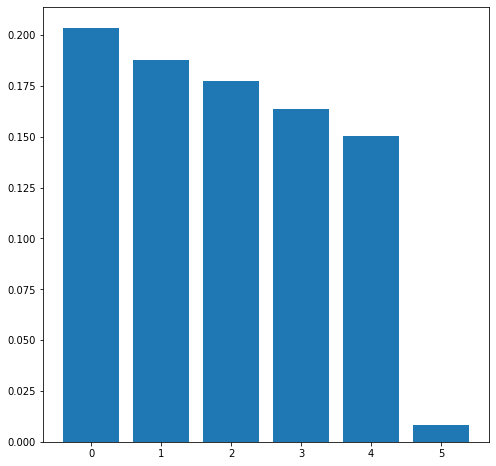

In [61]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

n_top = 6
top_kept = kept[:n_top]
print(top_kept)
print([decode(t) for t in top_kept])

top_vs = unembed_norm[:,top_kept].T

svd = TruncatedSVD(n_top)
transformed = torch.tensor(pca.fit_transform(top_vs))
var = torch.tensor(pca.explained_variance_)
comp = torch.tensor(pca.components_)

plt.bar(range(n_top), var)


In [62]:

n_top = 8
top_kept = kept[:n_top]
top_vs = unembed_norm[:,top_kept].T
print(top_kept)
print([decode(t) for t in top_kept])

q, r = torch.linalg.qr(top_vs)
print(q.shape, r.shape)
print(r)

[262, 31762, 22401, 40332, 35588, 20452, 42041, 33785]
[' the', 'irez', 'Wall', ' roadmap', ' Regiment', ' bapt', 'seeing', ' depended']
torch.Size([8, 8]) torch.Size([8, 768])
tensor([[ 0.0620, -0.0079,  0.0272,  ..., -0.0238, -0.0143, -0.0034],
        [ 0.0000,  0.0817, -0.0141,  ..., -0.0383, -0.0064,  0.0278],
        [ 0.0000,  0.0000, -0.1182,  ...,  0.0138,  0.0473, -0.0017],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0510, -0.0273,  0.0249],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0347,  0.0208,  0.0429],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0534, -0.0123, -0.0597]])


In [26]:
for i in range(n_top):
    for j in range(n_top):
        n0 = unembed_norm[:,kept[i]]
        n1 = unembed_norm[:,kept[j]]
        d = torch.dot(n0, n1)
        print(d)

tensor(1.0000)
tensor(-0.2208)
tensor(-0.0808)
tensor(-0.0652)
tensor(-0.0481)
tensor(-0.0223)
tensor(-0.0433)
tensor(-0.0103)
tensor(-0.2208)
tensor(1.)
tensor(-0.0829)
tensor(-0.0891)
tensor(-0.0530)
tensor(-0.0243)
tensor(-0.0283)
tensor(-0.0108)
tensor(-0.0808)
tensor(-0.0829)
tensor(1.0000)
tensor(-0.0743)
tensor(-0.0402)
tensor(-0.1176)
tensor(-0.0225)
tensor(-0.0298)
tensor(-0.0652)
tensor(-0.0891)
tensor(-0.0743)
tensor(1.0000)
tensor(-0.0634)
tensor(-0.0265)
tensor(-0.0112)
tensor(-0.0201)
tensor(-0.0481)
tensor(-0.0530)
tensor(-0.0402)
tensor(-0.0634)
tensor(1.)
tensor(-0.0227)
tensor(-0.0403)
tensor(-0.0050)
tensor(-0.0223)
tensor(-0.0243)
tensor(-0.1176)
tensor(-0.0265)
tensor(-0.0227)
tensor(1.)
tensor(-0.0746)
tensor(-0.0341)
tensor(-0.0433)
tensor(-0.0283)
tensor(-0.0225)
tensor(-0.0112)
tensor(-0.0403)
tensor(-0.0746)
tensor(1.0000)
tensor(-0.0457)
tensor(-0.0103)
tensor(-0.0108)
tensor(-0.0298)
tensor(-0.0201)
tensor(-0.0050)
tensor(-0.0341)
tensor(-0.0457)
tensor(1.00